# Region of Interest (ROI) Extraction from ORIGA dataset images

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import os

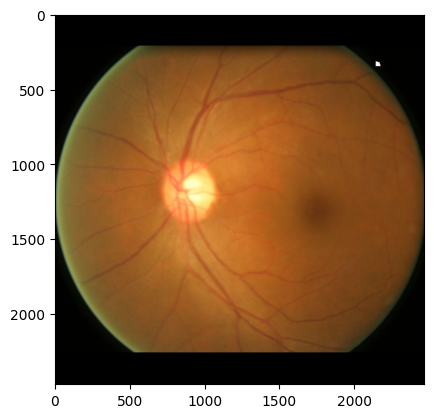

In [2]:
DATA_DIR = '../data/ORIGA'
IMAGES_DIR = DATA_DIR + '/TrainImages'
MASKS_DIR = DATA_DIR + '/TestImages'

files = sorted(os.listdir(IMAGES_DIR))
file = os.path.join(IMAGES_DIR, files[143])
img = cv.imread(file)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

## Method 1: Intensity weighted centroid

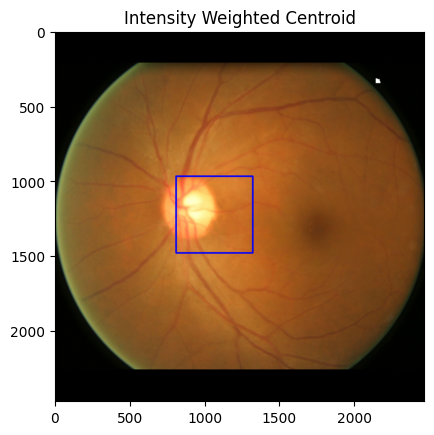

In [3]:
from ROI.intensity_weighted_centroid import IntensityWeightedCentroid

iwc = IntensityWeightedCentroid(
    512, 512, channel=-1, equalize=True, clahe=True, square=True,
    dampening='circular', k_size=65, quantile=0.9,
)
iwc.show(img)

In [ ]:
iwc.generate_dataset(
    src_images_dir=DATA_DIR + '/Images_Padded',
    src_masks_dir=DATA_DIR + '/Masks_Padded',
    dst_images_dir=DATA_DIR + '/Images_IntensityWeightedCentroid_Cropped',
    dst_masks_dir=DATA_DIR + '/Masks_IntensityWeightedCentroid_Cropped',
)

## Method 2: Brightest spot algorithm

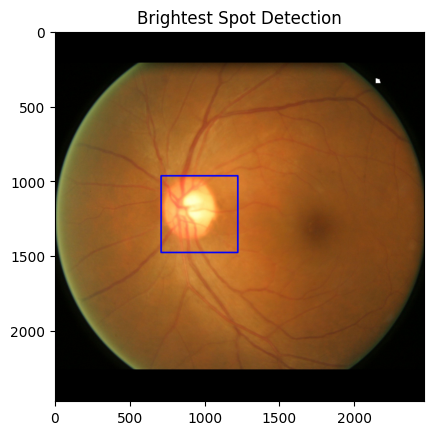

In [4]:
from ROI.brightest_spot import BrightestSpot

bs = BrightestSpot(512, 512, channel=-1, dampening='circular', k_size=65)
bs.show(img)

In [ ]:
bs.generate_dataset(
    src_images_dir=DATA_DIR + '/Images_Padded',
    src_masks_dir=DATA_DIR + '/Masks_Padded',
    dst_images_dir=DATA_DIR + '/Images_BrightestSpot_Cropped',
    dst_masks_dir=DATA_DIR + '/Masks_BrightestSpot_Cropped',
)

## Method 3: Thresholding channel

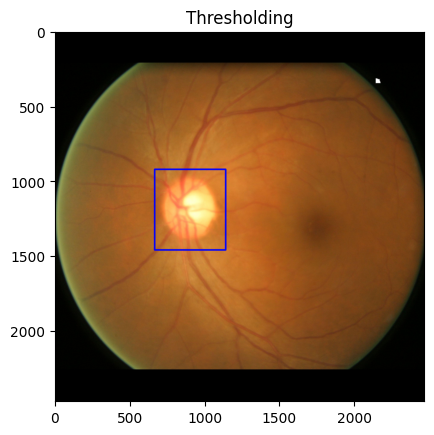

In [5]:
from ROI.thresholding import Thresholding

th = Thresholding(margin=50, channel=2, crop_size=250, k_size=35)
th.show(img)

In [ ]:
th.generate_dataset(
    src_images_dir=DATA_DIR + '/Images_Padded',
    src_masks_dir=DATA_DIR + '/Masks_Padded',
    dst_images_dir=DATA_DIR + '/Images_Threshold_Cropped',
    dst_masks_dir=DATA_DIR + '/Masks_Threshold_Cropped',
)

## Method 4: Template Matching

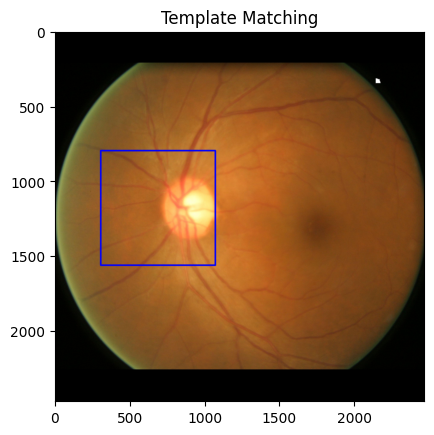

In [6]:
from ROI.template_matching import TemplateMatching, get_templates

templates = get_templates('../data/ORIGA/Images')

tm = TemplateMatching(
    templates,
    margin_x=60, margin_y=60,
    shape=(512, 512),
    scale=0.1,
    min_confidence=0.6,
    reduce='join',
)
tm.show(img)

In [ ]:
tm.generate_dataset(
    src_images_dir=DATA_DIR + '/Images_Padded',
    src_masks_dir=DATA_DIR + '/Masks_Padded',
    dst_images_dir=DATA_DIR + '/Images_TemplateMatching_Cropped',
    dst_masks_dir=DATA_DIR + '/Masks_TemplateMatching_Cropped',
)